## Introduction

### Final Project Submission

Name: Amelia Dobronyi  
Student Pace: Flex  
Instructor: Abhineet Kulkarni  

### Objective and Approach

The objective of this project is to use data analysis to determine concrete business objectives for Microsoft as it looks to create a studio to produce original content.

My choice of measurement to determine a film's is ROI, or return on investment, which I define as box office results divided by production budget. This allows for easier interpretation of the figure, such that an ROI equal to one means a film broke even on its budget, and an ROI greater than one means the films intake exceeded its production budget. Another reason I chose ROI is because it can be applied to look at a studio's success over time; as Microsoft creates a new studio, it will need to decide if it wants to continue funding the studio based on initial results.

The premise for my thinking is to look at ROIs for individual studios, then find the studio that Microsoft should look to emulate. Then I will look if traditional markers of success (ratings and popularity) do indeed have a relationship to the studio's success, and if so, what this studio's films have in common.


### Looking at studio and production results

The first step in data exploration will be loading in the necessary packages and data.

In [1]:
# import packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# read in csv files
movie_gross = pd.read_csv('bom.movie_gross.csv')         # studio and gross info
movies = pd.read_csv('tmdb.movies.csv')                  # ratings and popularity info
movie_budgets = pd.read_csv('tn.movie_budgets.csv')      # budget and gross info

Since my measurement for success will be ROIs, my first step is to combine the budget, box office, and studio info into a workable dataset. To do this, I will merge and clean the movie_gross and movie_budgets data sets.

In [3]:
# clean movie budget data - need budget and gross columns to be workable numbers
for column in ['production_budget','domestic_gross','worldwide_gross']:
    movie_budgets[column] = movie_budgets[column].str.strip('$')
    movie_budgets[column] = movie_budgets[column].map(lambda x : re.sub(',','',x))
    movie_budgets[column] = movie_budgets[column].astype(int)
    
# add columns for domestic and worldwide roi
movie_budgets['domestic_roi'] = movie_budgets['domestic_gross'] / movie_budgets['production_budget']
movie_budgets['worldwide_roi'] = movie_budgets['worldwide_gross'] / movie_budgets['production_budget']

In [4]:
# check that movie_budgets dataframe looks as expected
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,1.789430,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,0.587101,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,0.122178,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1.388403,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1.956408,4.153696


In [5]:
# check for duplicates
movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

Now that ROIs have been calculated for the available films, we will look primarily at domestic ROI data since it is reasonable to conclude that the domestic market will be, at least at first, Microsoft's primary market. 

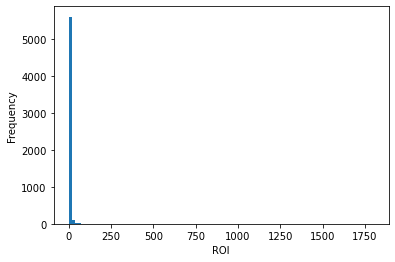

In [6]:
# plot histogram of domestic ROI
fig, ax = plt.subplots()
ax.hist(movie_budgets['worldwide_roi'],bins=100);
ax.set_xlabel('ROI')
ax.set_ylabel('Frequency');

From the initial histogram, it appears that the majority of films have low ROIs (let's say less than 100) while an exceedingly small number of films have a very high ROI. We should examine the outliers and also set parameters on what qualifies as reasonable data.

In [7]:
movie_budgets[movie_budgets['domestic_roi'] > 500]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,1800.0,1800.0


There is only one film with a domestic ROI greater than 500, *Deep Throat* from 1972. Since this is a pornographic film, I am comfortable excluding it from the data set both on the basis of genre and being an outlier. Additionally, we should exclude any films where domestic or worldwide gross is zero. While this is perhaps meaningful data, it may also be untrustworthy since the likelihood of a studio releasing a film that not a single person will pay to see is highly unlikely. 

In [8]:
# exclude movies where domestic or worldwide gross is zero
# while this data may in fact be meaningful, it may also qualify as untrustworthy
movie_budgets_posGross = movie_budgets[movie_budgets['domestic_roi'] > 0]

# given that there is only one film with either domestic or worldwide roi > 500, we will exlcude it
movie_budgets_posGross = movie_budgets[movie_budgets['domestic_roi'] < 500]

In [9]:
# check number of movies remaining in dataset
movie_budgets_posGross.shape[0]

5781

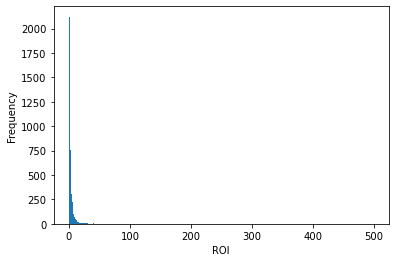

In [10]:
# new distribution of ROIs
fig, ax = plt.subplots()
ax.hist(movie_budgets_posGross['worldwide_roi'],bins=500);
ax.set_xlabel('ROI')
ax.set_ylabel('Frequency');

Though the vast majority of films still appear to have ROIs below 50, the range of ROIs is now much more condensed. Moreover, this distribution makes sense - most films will have average returns and only a handful of films will generate high-multiple returns. 

In [11]:
# look at the films with ROIs greater than 50 - this number is arbitrarily chosen based on the histogram
movie_budgets_posGross[movie_budgets_posGross['worldwide_roi'] > 50]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,41.908910,71.508910
3525,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000,435110554,792965326,41.439100,75.520507
4112,13,"Jun 16, 1978",Grease,6000000,181813770,387510179,30.302295,64.585030
4247,48,"Apr 19, 2002",My Big Fat Greek Wedding,5000000,241438208,374890034,48.287642,74.978007
4248,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,35.208133,51.073590
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,27.628317,55.792961
4424,25,"Mar 9, 1994",Four Weddings and a Funeral,4500000,52700832,242895809,11.711296,53.976846
4567,68,"Dec 15, 1939",Gone with the Wind,3900000,198680470,390525192,50.943710,100.134665
4589,90,"Aug 13, 1997",The Full Monty,3500000,45950122,261249383,13.128606,74.642681
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,28.250969,59.170677


Now that the provided budget and box office data has been cleaned, it can be combined with the provided studio data to look at which studios are successful.

In [12]:
# check for duplicates in movie_gross dataframe
movie_gross.duplicated().value_counts()

False    3387
dtype: int64

In [13]:
# check for missing values in movie_gross dataframe, focusing on domestic_gross (since we are looking at domestic ROI)
movie_gross['domestic_gross'].isna().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [14]:
# there are 28 missing values out of 3387 films in the dataset
# for ease and because the domestic gross data cannot be approximated by distribution, we will exclude those
domestic_gross = movie_gross[~movie_gross['domestic_gross'].isna()]
domestic_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
# check number of movies remaining in this dataset
domestic_gross.shape[0]

3359

In [16]:
# check counts of films by year
domestic_gross['year'].value_counts()

2015    449
2016    433
2011    397
2012    393
2014    391
2013    345
2010    323
2017    320
2018    308
Name: year, dtype: int64

Since we now only have domestic gross and studio data for films in the years 2010 to 2018, our analysis is naturally going to be limited to this period. While this does reduce the scale of our data, it is arguably more relevant for the analysis because the movie industry is constantly transforming and more recent data should by extension be more important for Microsoft to consider.

In [17]:
# merge movie budget and studio data into a new dataframe
# use movie titles as the shared column for the merge
domestic = pd.merge(movie_budgets_posGross, domestic_gross, left_on = 'movie', right_on = 'title')

In [18]:
# check new dataframe
domestic.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,domestic_roi,worldwide_roi,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,0.587101,2.546673,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1.388403,4.243841,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2.262718,6.827114,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,0.763414,2.186484,Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,0.666914,2.932070,Spectre,Sony,200100000.0,680600000,2015


In [19]:
# since we have a couple of repeated columns, can reduce dataframe dimension to relevant data
domestic = domestic[['release_date','movie','production_budget','domestic_gross_x','domestic_roi','studio','year']]
domestic.columns = ['release_date','movie','production_budget','domestic_gross','domestic_roi','studio','year']
domestic.head()

,release_date,movie,production_budget,domestic_gross,domestic_roi,studio,year
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,0.587101,BV,2011
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.388403,BV,2015
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.262718,BV,2018
3,"Nov 17, 2017",Justice League,300000000,229024295,0.763414,WB,2017
4,"Nov 6, 2015",Spectre,300000000,200074175,0.666914,Sony,2015


In [20]:
# check number of movies remaining after the merge
domestic.shape[0]

1245

In the course of combining the data we need, which is studio, production budget, and box offie results, we are left with 1245 movies in the years from 2010 to 2018. Now we can begin looking at ROI data by studio for those years. To do this, we can rearrange the dataframe and then utilize the groupby() function to group films by studio.

In [21]:
# group film data to get mean data by studio and year
dom_gross_by_studio = domestic.groupby(['studio','year']).sum()
dom_gross_by_studio.reset_index(inplace=True)
dom_gross_by_studio.head()

,studio,year,production_budget,domestic_gross,domestic_roi
0,3D,2010,5000000,6096582,1.219316
1,A24,2013,7500000,20977257,5.566046
2,A24,2014,34500000,13173578,4.833217
3,A24,2015,36000000,47700710,3.844256
4,A24,2016,15000000,33232777,9.419545


In [22]:
# create a new table by pivoting data
# want to be able to calculate cumulative ROIs for studios
domestic_pivot = pd.pivot(dom_gross_by_studio, values = ['production_budget','domestic_gross'], index = 'studio',
                         columns = 'year')

In [23]:
# look at new pivot table
domestic_pivot.head()

production_budget                                                      \
year                2010        2011 2012       2013        2014        2015   
studio                                                                         
3D             5000000.0         NaN  NaN        NaN         NaN         NaN   
A24                  NaN         NaN  NaN  7500000.0  34500000.0  36000000.0   
ALP                  NaN  26000000.0  NaN        NaN         NaN         NaN   
ATO           12500000.0         NaN  NaN        NaN         NaN         NaN   
Affirm               NaN         NaN  NaN        NaN         NaN         NaN   

                                           domestic_gross                \
year          2016        2017        2018           2010     2011 2012   
studio                                                                    
3D             NaN         NaN         NaN      6096582.0      NaN  NaN   
A24     15000000.0  32100000.0  18000000.0            NaN      NaN  NaN   
ALP            NaN         NaN         NaN            NaN  42472.0  NaN   
ATO            NaN         NaN         NaN      2039869.0      NaN  NaN   
Affirm         NaN   2000000.0   5000000.0            NaN      NaN  NaN   

                                                                                
year          2013        2014        2015        2016        2017        2018  
studio                                                                          
3D             NaN         NaN         NaN         NaN         NaN         NaN  
A24     20977257.0  13173578.0  47700710.0  33232777.0  79377375.0  45232512.0  
ALP            NaN         NaN         NaN         NaN         NaN         NaN  
ATO            NaN         NaN         NaN         NaN         NaN         NaN  
Affirm         NaN         NaN         NaN         NaN   5802208.0  17547999.0

In [24]:
# the table has the necessary structure, but missing values are unhelpful
# need to remove those to see which studios have complete data
domestic_pivot = domestic_pivot.dropna(axis='rows')
domestic_pivot.head()

production_budget                                           \
year                2010          2011         2012          2013   
studio                                                              
BV           775000000.0  1.084600e+09  785000000.0  1.058000e+09   
Focus         39000000.0  9.320000e+07  135000000.0  5.300000e+07   
Fox          757500000.0  7.020000e+08  746500000.0  1.048000e+09   
FoxS          99970000.0  1.018750e+08   12935000.0  8.945000e+07   
LGF          309787650.0  1.191000e+08  340500000.0  2.385000e+08   

                                                                             \
year            2014          2015          2016         2017          2018   
studio                                                                        
BV      9.372000e+08  1.050100e+09  1.530000e+09  760000000.0  1.470900e+09   
Focus   9.400000e+07  6.000000e+07  2.163000e+08   81000000.0  6.000000e+07   
Fox     1.313000e+09  1.058500e+09  9.030000e+08  825000000.0  4.020000e+08   
FoxS    5.160000e+07  4.200000e+07  9.000000e+06   69500000.0  2.500000e+07   
LGF     2.950000e+08  3.545000e+08  1.650000e+08   98000000.0  1.490000e+08   

       domestic_gross                                                         \
year             2010          2011         2012          2013          2014   
studio                                                                         
BV        846752076.0  1.014376e+09  781534541.0  1.491097e+09  1.437242e+09   
Focus      64567014.0  1.105614e+08  121410622.0  9.271397e+07  1.188419e+08   
Fox       736123170.0  9.373424e+08  911077035.0  1.022228e+09  1.470344e+09   
FoxS      187833172.0  1.144864e+08   65589851.0  1.091109e+08  7.066039e+07   
LGF       401504551.0  1.011150e+08  739488699.0  5.639170e+08  4.129245e+08   

                                                               
year            2015          2016         2017          2018  
studio                                                         
BV      1.328987e+09  2.430741e+09  850244295.0  2.745169e+09  
Focus   9.694162e+07  1.657258e+08  130262115.0  9.036653e+07  
Fox     1.302526e+09  1.281602e+09  977545978.0  7.714462e+08  
FoxS    8.086272e+07  1.396039e+07  160227957.0  4.317065e+07  
LGF     4.560431e+08  2.677968e+08  249597782.0  1.400773e+08

In [25]:
# look at size of new table to see how many studios we will look at
domestic_pivot.shape[0]

12

Now that complete production budget and gross data has been isolated for 12 studios for the years 2010 to 2018, we can calculate cumulative data and use that to draw a conclusion about each studio's success, as determined by ROI.

In [26]:
# create dataframes with cumulative production budget and domestic gross data by year
budget_cum = np.cumsum(domestic_pivot.iloc[:,0:9], axis=1)
gross_cum = np.cumsum(domestic_pivot.iloc[:,9:19], axis=1)

# create dataframe with cumulative ROI data
roi_cum = pd.DataFrame()
for a in np.arange(2010,2019):
    roi_cum[a] = (gross_cum[('domestic_gross', a)] / 
                  budget_cum[('production_budget', a)])

roi_cum.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
BV,1.092583,1.000822,0.999268,1.116448,1.200699,1.212673,1.292363,1.275827,1.367730
Focus,1.655564,1.324723,1.109802,1.215656,1.226690,1.275910,1.116238,1.167887,1.192292
Fox,0.971780,1.146602,1.171597,1.108411,1.111696,1.134057,1.173507,1.174786,1.213363
FoxS,1.878895,1.497781,1.712959,1.567960,1.539164,1.579930,1.579293,1.685243,1.687317
LGF,1.296064,1.171914,1.614411,1.791891,1.703101,1.613981,1.614799,1.662366,1.610363


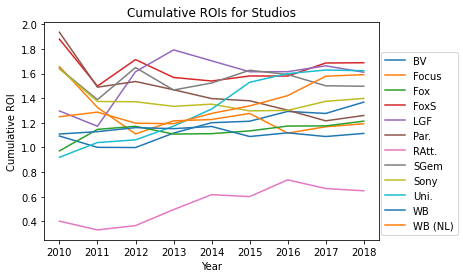

In [27]:
# plot cumulative ROI of studios from 2010 (first year of data) to 2018 (last year of data)
fig,ax = plt.subplots()
for b in range(roi_cum.shape[0]):
    ax.plot(roi_cum.columns, roi_cum.iloc[b,], label = roi_cum.index[b])
    
ax.legend(loc = 'lower right', bbox_to_anchor = (1.25,0))
ax.set_xlabel('Year', size = 10)
ax.set_ylabel('Cumulative ROI', size=10)
ax.set_title('Cumulative ROIs for Studios');

From looking at the plot of cumulative ROI over the years in question, we want to look at studios that not only have a high ROI at the beginning of the range, but also throughout the range. This is because strong initial returns are important to decide if investment in the studio should be ongoing (rather than discontinued), and strong returns over time suggest the studio will be viable as a going concern. 

From this plot, it appears that one studio fits this criteria well: FoxS. To highlight FoxS among the other studios, we can update this plot to better highlight the FoxS line.

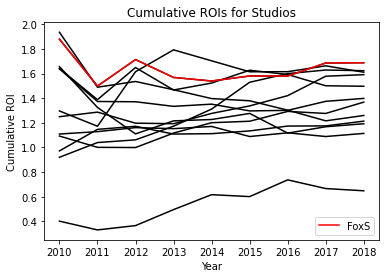

In [28]:
# plot cumulative ROI of studios from 2010 (first year of data) to 2018 (last year of data)
fig,ax = plt.subplots()
for b in range(roi_cum.shape[0]):
    ax.plot(roi_cum.columns, roi_cum.iloc[b,], color = 'black')
    
ax.plot(roi_cum.columns, roi_cum.loc['FoxS',:], color = 'red', label = 'FoxS')
ax.legend(loc = 'lower right')
ax.set_xlabel('Year', size = 10)
ax.set_ylabel('Cumulative ROI', size=10)
ax.set_title('Cumulative ROIs for Studios');

### Conclusion on finding a successful studio

From looking solely at the cumulative ROI of the studios for which we had continuous production data (which is not exhaustive), we can see that the studio "FoxS" had one of the highest initial ROIs and by 2018, the highest cumulative ROI. This is an appealing comparison for the trajectory of establishing a new studio because it suggests that it is possible to start with a relatively high ROI and maintain it over time, which should be the goal of Microsoft's new film unit.

### Looking at drivers of successful films

Though we have established that FoxS is the studio worth emulating, we should continue to look into the drivers of successful films (as determined by ROI) to determine actionable insights that Microsoft can take. To do this, we will continue to use the same universe of domestic films in the period 2010 to 2018 to ensure continuity in the data. We will also need to take advantage of datasets that have more information specifically on those films.

The drivers I will try to look at in particular are genre, movie runtime, and movie release date.

In [29]:
# connect to database and confirm schema for local reference
conn = sqlite3.connect('im.db')
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [30]:
# read movie_basics table into a new dataframe
movie_basics = pd.read_sql("""
SELECT *
    FROM movie_basics;
""",conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
# convert movie year to int
movie_basics['year'] = movie_basics['start_year'].astype(int)

In [32]:
# merge data from database and final dataset onto domestic movies data
domestic_plus = pd.merge(domestic, movie_basics, how = 'inner',left_on = 'movie', right_on = 'primary_title')
domestic_plus.head()

,release_date,movie,production_budget,domestic_gross,domestic_roi,studio,year_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,year_y
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,0.587101,BV,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.388403,BV,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.262718,BV,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018
3,"Nov 17, 2017",Justice League,300000000,229024295,0.763414,WB,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",2017
4,"Nov 6, 2015",Spectre,300000000,200074175,0.666914,Sony,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",2015


In [33]:
domestic_plus.shape

(1601, 14)

In [34]:
# need to filter domestic_plus to account for repeated rows
domestic_plus = domestic_plus[(domestic_plus['movie'].isin(domestic['movie'])) & 
                               (domestic_plus['start_year'].isin(domestic['year']))]

In [35]:
domestic_plus.head()

,release_date,movie,production_budget,domestic_gross,domestic_roi,studio,year_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,year_y
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,0.587101,BV,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.388403,BV,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.262718,BV,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018
3,"Nov 17, 2017",Justice League,300000000,229024295,0.763414,WB,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",2017
4,"Nov 6, 2015",Spectre,300000000,200074175,0.666914,Sony,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",2015


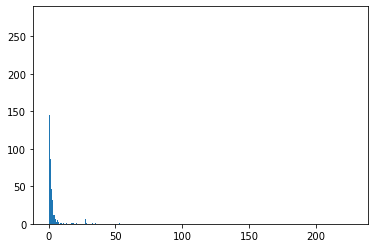

In [36]:
# look at distribution of ROI for domestic films considered
fig, ax = plt.subplots()
ax.hist(domestic_plus['domestic_roi'],bins=1000);

From the distribution of domestic ROI of the current data set, again it appears that the concentration of films have an ROI lower than 50, and most seem to be clustered near zero.

In [37]:
# check films that have ROI greater than 50, since most appear to be lower
domestic_plus[domestic_plus['domestic_roi'] > 50]

,release_date,movie,production_budget,domestic_gross,domestic_roi,studio,year_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,year_y
1542,"Jan 6, 2012",The Devil Inside,1000000,53262945,53.262945,Par.,2012,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,2012
1598,"Jul 10, 2015",The Gallows,100000,22764410,227.644100,WB (NL),2015,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",2015


In [38]:
domestic_plus = domestic_plus[domestic_plus['domestic_roi'] < 50]

Since there are only two films with ROI greater than 50, we will go ahead an exclude them from the data. However, we should note that both of these films are horror films. On that note, we should look more closely at genres as the first point of analysis.

In [39]:
# make a copy of the dataframe as we modify it to get genres
# split genre strings into lists to make it easier to loop through
copy = pd.DataFrame.copy(domestic_plus)
copy['genres'] = copy['genres'].apply(lambda x: x.split(',') if x else x)

In [40]:
type(copy['genres'][0])

list

In [41]:
# get a list of unique genres
all_genres = set()

for item in copy['genres']:
    if item:
        all_genres.update(item)

In [42]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [43]:
# get the mean domestic ROI by genre
mean_genre_ratings = []
for g in all_genres:
    mean_genre_ratings.append(domestic_plus.groupby(domestic_plus['genres'].str.contains(g)).mean().loc[1]['domestic_roi'])

In [44]:
mean_genre_ratings

[1.2861173568220456,
 1.7239180564748542,
 1.275028069663813,
 1.4289299408230822,
 1.7047003253557638,
 0.6030779260062386,
 1.9729609324618995,
 4.410944109913672,
 1.6736327471729786,
 3.1439550030097405,
 1.9066402696445983,
 1.594249244477848,
 3.940122993528792,
 1.2177715306941463,
 2.418379587193599,
 2.741051837471123,
 0.3142880114942529,
 1.736147639724475,
 1.9065856366017777,
 1.2920222063765123,
 1.433880917791227,
 0.8880954053819946]

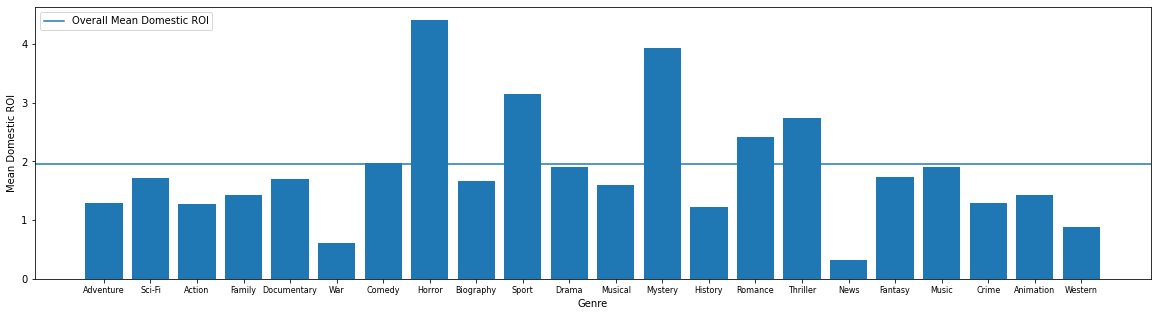

In [45]:
# plot chart of mean domestic ROI by genre
fig,ax = plt.subplots(figsize=(20,5))

ax.bar(np.arange(len(mean_genre_ratings)),mean_genre_ratings)
plt.axhline(y=domestic_plus['domestic_roi'].mean(), label = 'Overall Mean Domestic ROI')
plt.xticks(np.arange(len(mean_genre_ratings)),all_genres, fontsize = 8)
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Domestic ROI')
ax.legend(loc = 'upper left');

The chart above shows the mean ROI by genre of the films considered. The horizontal line is the mean ROI of all the films, so the bars that are above it represent the genres that have "above average" ROIs. From the chart, we see that romance, sport, mystery, thriller, and horror films are all genres that have significantly higher ROIs. Additionally, we should remember that the films excluded were in the genres horror, myster, and thriller, so without those films having been removed, the bars for those genres would be even higher.

Now that we have drawn some conclusions about genre, we can look at release dates. To do this, we will break down release date into smaller components, specifically release month and release date within the year (that is, the release date out of 365). Additionally, having established which genres are associated with altogether higher domestic ROI, we will limit the universe to those genres going forward.

In [46]:
# look at just the genres Microsoft will be encouraged to produce: thriller, mystery, romance, sport, horror
domestic_plus_g = domestic_plus[(domestic_plus['genres'].str.contains('Thriller')) |
                                (domestic_plus['genres'].str.contains('Mystery')) |
                                (domestic_plus['genres'].str.contains('Romance')) |
                                (domestic_plus['genres'].str.contains('Sport')) |
                                (domestic_plus['genres'].str.contains('Horror'))]

In [47]:
# make release date data more granular
domestic_plus_g['release_date'] = pd.to_datetime(domestic_plus_g['release_date'])
domestic_plus_g['release_month'] = domestic_plus_g['release_date'].dt.month
domestic_plus_g['date_in_year'] = domestic_plus_g['release_date'].dt.dayofyear

<ipython-input-47-da74a7643e53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_plus_g['release_date'] = pd.to_datetime(domestic_plus_g['release_date'])
<ipython-input-47-da74a7643e53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_plus_g['release_month'] = domestic_plus_g['release_date'].dt.month
<ipython-input-47-da74a7643e53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

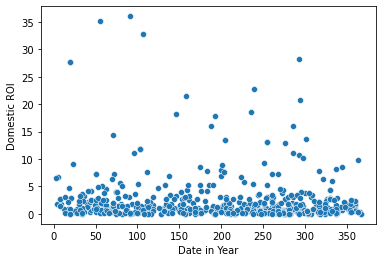

In [48]:
# plot ROI vs release date in year
fig,ax = plt.subplots()

sns.scatterplot(x = domestic_plus_g['date_in_year'], y = domestic_plus_g['domestic_roi']);
ax.set_xlabel('Date in Year')
ax.set_ylabel('Domestic ROI');

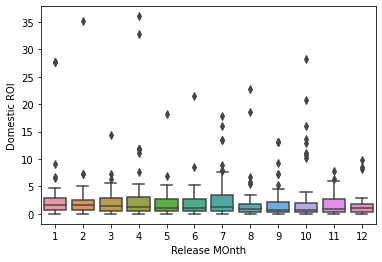

In [49]:
# plot ROI vs release month
fig,ax = plt.subplots()

sns.boxplot(x = domestic_plus_g['release_month'], y = domestic_plus_g['domestic_roi']);
ax.set_xlabel('Release MOnth')
ax.set_ylabel('Domestic ROI');

Though there are a couple of periods of releases that appear to correspond to higher ROIs (the first third of the year, and then perhaps October), it is not clear from either chart that there is a strong relationship.

Now we can address movie runtime as a driver of ROI.

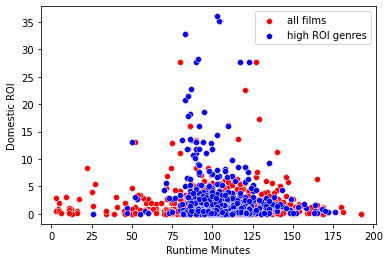

In [50]:
# plot ROI vs runtime minutes
fig,ax = plt.subplots()

sns.scatterplot(x = domestic_plus['runtime_minutes'], y = domestic_plus['domestic_roi'], 
                color = 'red', label = 'all films');
sns.scatterplot(x = domestic_plus_g['runtime_minutes'], y = domestic_plus_g['domestic_roi'], 
                color = 'blue', label = 'high ROI genres');
ax.set_xlabel('Runtime Minutes')
ax.set_ylabel('Domestic ROI');

From plotting the ROI vs runtime minutes of these films, it appears that while the films in higher ROI genres are more concetrated to the middle of the runtime minutes, it is still a range encompassing about 1.25 to 2.5 hours, which is quite large. To make better since of this data, as well as more actionable goals, we can create runtime 'bins' that might give better insight.

In [51]:
# create buckets to look at runtime more closely
bins = np.array([0,15,30,45,60,75,90,105,120,135,150,165,180,195,210])

domestic_plus['runtime_buckets'] = pd.cut(domestic_plus['runtime_minutes'],bins)
domestic_plus_g['runtime_buckets'] = pd.cut(domestic_plus_g['runtime_minutes'],bins)

<ipython-input-51-f47e887ac169>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_plus_g['runtime_buckets'] = pd.cut(domestic_plus_g['runtime_minutes'],bins)


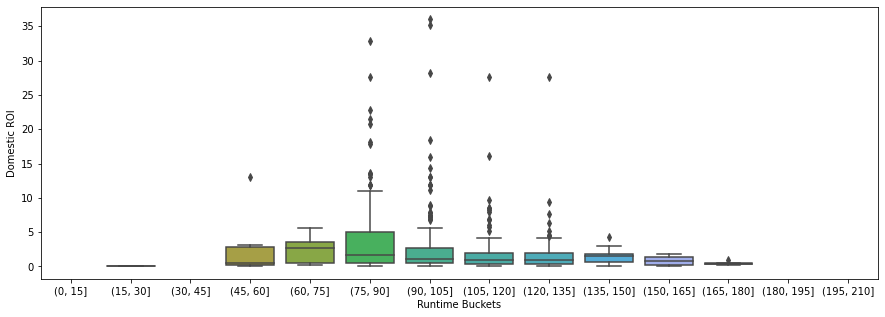

In [52]:
fig,ax = plt.subplots(figsize = (15,5))

sns.boxplot(x = domestic_plus_g['runtime_buckets'], y = domestic_plus_g['domestic_roi'])
ax.set_xlabel('Runtime Buckets')
ax.set_ylabel('Domestic ROI');

Looking at the chart via buckets, we have a similar conclusion: it seems most buckets have similar median ROIs, and the high ROI films fall again into a wide range of buckets. As it seems we are getting stuck again in our new limited universe, we can refocus on just the films we want to make: those with high (or above average) ROIs.

In [53]:
# look at some distritbution statistics for the current dataset
print("Median: ",domestic_plus_g['domestic_roi'].median())
print("Mean: ",domestic_plus_g['domestic_roi'].mean())
print("75th Percentile: ",domestic_plus_g['domestic_roi'].quantile(.75))

Median:  1.064691075
Mean:  2.5062275480406315
75th Percentile:  2.5499685714285714


In [54]:
# compare to mean of original dataset
domestic_plus['domestic_roi'].mean()

1.9591903307107381

Since the mean ROI of the data with targeted genres is by design higher than the mean of the original data we were using, we want to target films that fall above the mean of the original dataset in an effort to produce the films with ROIs that all above it.

In [55]:
# limit data to films with ROI greater than original mean domestic ROI
domestic_limit = domestic_plus_g[domestic_plus_g['domestic_roi'] > domestic_plus['domestic_roi'].mean()]

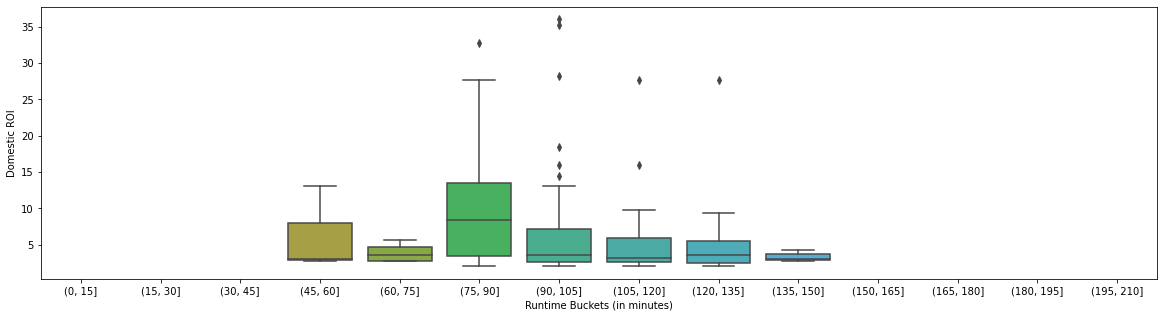

In [56]:
# plot ROI vs runtime bucket
fig,ax = plt.subplots(figsize = (20,5))

sns.boxplot(x = domestic_limit['runtime_buckets'], y = domestic_limit['domestic_roi']);
ax.set_xlabel('Runtime Buckets (in minutes)')
ax.set_ylabel('Domestic ROI');

After narrowing the number of films in consideration, it is more clear that films in the 75 to 90 minute bucket have a higher median ROI in comparison to films in other runtime buckets. While the expected runtime ranges have similar distributions suggested by the boxplot, those in the 75 to 90 minute bucket have a clearly higher median ROI.

Looking at the same subset of films, we can go back to release time data and see if there is any similar type of conclusion to be drawn.

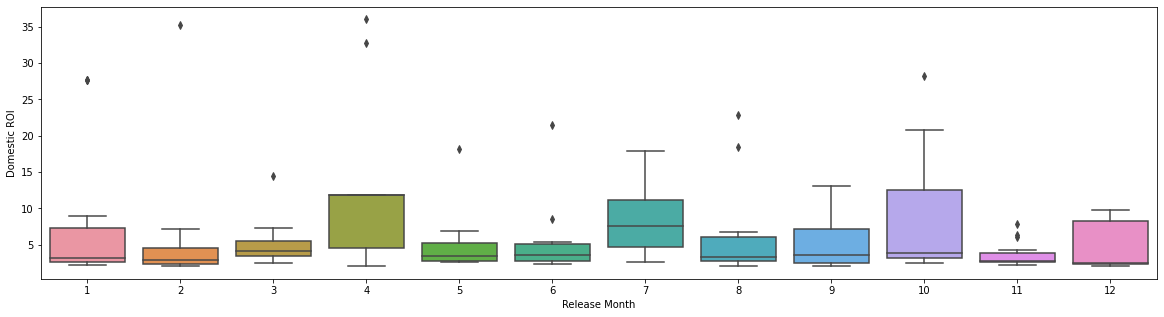

In [57]:
# plot ROI vs release month
fig,ax = plt.subplots(figsize = (20,5))

sns.boxplot(x = domestic_limit['release_month'], y = domestic_limit['domestic_roi']);
ax.set_xlabel('Release Month')
ax.set_ylabel('Domestic ROI');

Here we can see that films released in April and July have clearly higher median ROIs than films released in other months. From the above two charts, we can suggest that, if Microsoft produces films in the corresponding higher-ROI genres, then they should aim to make their films about 75 to 90 minutes long, and look to concentrate their releases in April and July.

## Conclusion

From the analysis of film data, we can make the following recommendations to Microsoft.

1. Microsoft should emulate studios that have high initial ROIs and maintain them over time; specifically, the FoxS studio is one that Microsoft should look to model itself after.

2. Microsoft should focus on producing movies of the genres horror, mystery / thriller, romance, and sport. Horror, muystery, and thriller in particular have the potential for outlying ROIs.

3. Microsoft should aim to make its films 75 to 90 minutes long, and release them in either April or July.